# Figure 10: Projections GLOB vs HMA
conda env: `phd_v3` (in `envs/phd`)

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


## Set variables

In [2]:
period_future = slice('2015','2100')
period_past = slice('1979','2014')
latlim, lonlim = u.get_domain_HMA()
lonlim_HK, latlim_HK, lonlim_HM, latlim_HM, lonlim_TP, latlim_TP = u.get_zones()
seasons = ['Annual', 'DJFMA', 'JJAS']
# seasons = ['Annual']

# HMA for full domain and the following for the above zones
zones = ['GLOB', 'GLOB-land', 'NH-land', 'NH-land-60', 'HMA', 'HK', 'HM', 'TP']
zones_df = pd.DataFrame(
    [
        [slice(None), slice(None)], 
        [slice(None), slice(None)], 
        [slice(None), slice(0,90)], 
        [slice(None), slice(0,60)], 
        [lonlim, latlim],
        [lonlim_HK, latlim_HK],
        [lonlim_HM, latlim_HM],
        [lonlim_TP, latlim_TP]
    ], 
    columns=pd.Index(['lonlim', 'latlim'], name='Limits'),
    index=pd.Index(zones, name='Zones')
)

## Load results

In [3]:
list_models = u.get_model_names_projections()
scenarios = ['ssp126', 'ssp245', 'ssp370', 'ssp585']
variables = ['tas', 'snc', 'pr']

ym_past = [None]*len(variables)
ym_future = [None]*len(variables)

for i, var in enumerate(variables):
    ym_past[i] = xr.open_dataarray('results/projections_GLOB-HMA_'+var+'_'+period_past.start+'-'+period_past.start+'_mm_past_ym_zones.nc')
    ym_future[i] = xr.open_dataarray('results/projections_GLOB-HMA_'+var+'_'+period_future.start+'-'+period_future.start+'_mm_future_ym_zones_scenarios.nc')

## Compute values

In [4]:
variables = ['tas', 'snc', 'pr']

df = pd.DataFrame(
    index=[
        [season for season in seasons for i in range(len(scenarios))],
        scenarios*len(seasons)
    ],
    columns=[
        [var for var in variables for i in range(len(zones))],
        zones*len(variables)
    ]
)

# Initialiaze with empty list
for var in variables:
    for zone in zones:
        df[(var, zone)] = [[] for _ in range(len(df))]

df

tas                                               snc  \
              GLOB GLOB-land NH-land NH-land-60 HMA  HK  HM  TP GLOB   
Annual ssp126   []        []      []         []  []  []  []  []   []   
       ssp245   []        []      []         []  []  []  []  []   []   
       ssp370   []        []      []         []  []  []  []  []   []   
       ssp585   []        []      []         []  []  []  []  []   []   
DJFMA  ssp126   []        []      []         []  []  []  []  []   []   
       ssp245   []        []      []         []  []  []  []  []   []   
       ssp370   []        []      []         []  []  []  []  []   []   
       ssp585   []        []      []         []  []  []  []  []   []   
JJAS   ssp126   []        []      []         []  []  []  []  []   []   
       ssp245   []        []      []         []  []  []  []  []   []   
       ssp370   []        []      []         []  []  []  []  []   []   
       ssp585   []        []      []         []  []  []  []  []   []   

                         ...           pr                                   \
              GLOB-land  ...  HM  TP GLOB GLOB-land NH-land NH-land-60 HMA   
Annual ssp126        []  ...  []  []   []        []      []         []  []   
       ssp245        []  ...  []  []   []        []      []         []  []   
       ssp370        []  ...  []  []   []        []      []         []  []   
       ssp585        []  ...  []  []   []        []      []         []  []   
DJFMA  ssp126        []  ...  []  []   []        []      []         []  []   
       ssp245        []  ...  []  []   []        []      []         []  []   
       ssp370        []  ...  []  []   []        []      []         []  []   
       ssp585        []  ...  []  []   []        []      []         []  []   
JJAS   ssp126        []  ...  []  []   []        []      []         []  []   
       ssp245        []  ...  []  []   []        []      []         []  []   
       ssp370        []  ...  []  []   []        []      []         []  []   
       ssp585        []  ...  []  []   []        []      []         []  []   

                           
               HK  HM  TP  
Annual ssp126  []  []  []  
       ssp245  []  []  []  
       ssp370  []  []  []  
       ssp585  []  []  []  
DJFMA  ssp126  []  []  []  
       ssp245  []  []  []  
       ssp370  []  []  []  
       ssp585  []  []  []  
JJAS   ssp126  []  []  []  
       ssp245  []  []  []  
       ssp370  []  []  []  
       ssp585  []  []  []  

[12 rows x 24 columns]

In [5]:
# list_models.remove('CanESM5')
# list_models.remove('IPSL-CM6A-LR')
# list_models.remove('CNRM-CM6-1')
# list_models.remove('CNRM-CM6-1-HR')
# list_models.remove('CNRM-ESM2-1')
list_models

['BCC-CSM2-MR',
 'CNRM-CM6-1',
 'CNRM-CM6-1-HR',
 'CNRM-ESM2-1',
 'CanESM5',
 'IPSL-CM6A-LR',
 'MIROC-ES2L',
 'MIROC6',
 'MRI-ESM2-0',
 'UKESM1-0-LL']

In [5]:
%%time

for i, var in enumerate(variables):
    
    # clim_ref (zone: 7, season: 3, model: 10)
    clim_ref = ym_past[i].sel(year=slice('1995','2014')).mean('year')
    
    y_start = 2015
    delta = 20
    y_end = y_start + delta - 1
    step = 10

    while y_end < 2100:
        for model in list_models:
            
            # temp (scenario: 4, zone: 7, season: 3, model: 10)
            if var in ['snc', 'pr']: #relative
                temp = (ym_future[i].sel(
                    year=slice(str(y_start),str(y_end)), model=model
                ).mean('year') - clim_ref.sel(model=model)) / clim_ref.sel(model=model) * 100
            else:
                temp = ym_future[i].sel(
                    year=slice(str(y_start),str(y_end)), model=model
                ).mean('year') - clim_ref.sel(model=model)

            for scenario in scenarios:
                for zone in zones:
                    for season in seasons:
                        df.loc[(season, scenario), (var, zone)].append(
                            temp.sel(season=season, scenario=scenario, zone=zone).values.tolist()
                        )

        y_start += step
        y_end = y_start + delta - 1

CPU times: user 31.4 s, sys: 84 ms, total: 31.5 s
Wall time: 33.3 s


In [6]:
# Check 7 period for 10 models = 70
for var in ['tas']:
    for zone in zones:
        print (zone)
        for scenario in scenarios:
            print(scenario + ' : ' + str(len(df.loc[('Annual', scenario), (var, zone)])))

GLOB
ssp126 : 70
ssp245 : 70
ssp370 : 70
ssp585 : 70
GLOB-land
ssp126 : 70
ssp245 : 70
ssp370 : 70
ssp585 : 70
NH-land
ssp126 : 70
ssp245 : 70
ssp370 : 70
ssp585 : 70
NH-land-60
ssp126 : 70
ssp245 : 70
ssp370 : 70
ssp585 : 70
HMA
ssp126 : 70
ssp245 : 70
ssp370 : 70
ssp585 : 70
HK
ssp126 : 70
ssp245 : 70
ssp370 : 70
ssp585 : 70
HM
ssp126 : 70
ssp245 : 70
ssp370 : 70
ssp585 : 70
TP
ssp126 : 70
ssp245 : 70
ssp370 : 70
ssp585 : 70


## Plot

In [7]:
zones

['GLOB', 'GLOB-land', 'NH-land', 'NH-land-60', 'HMA', 'HK', 'HM', 'TP']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

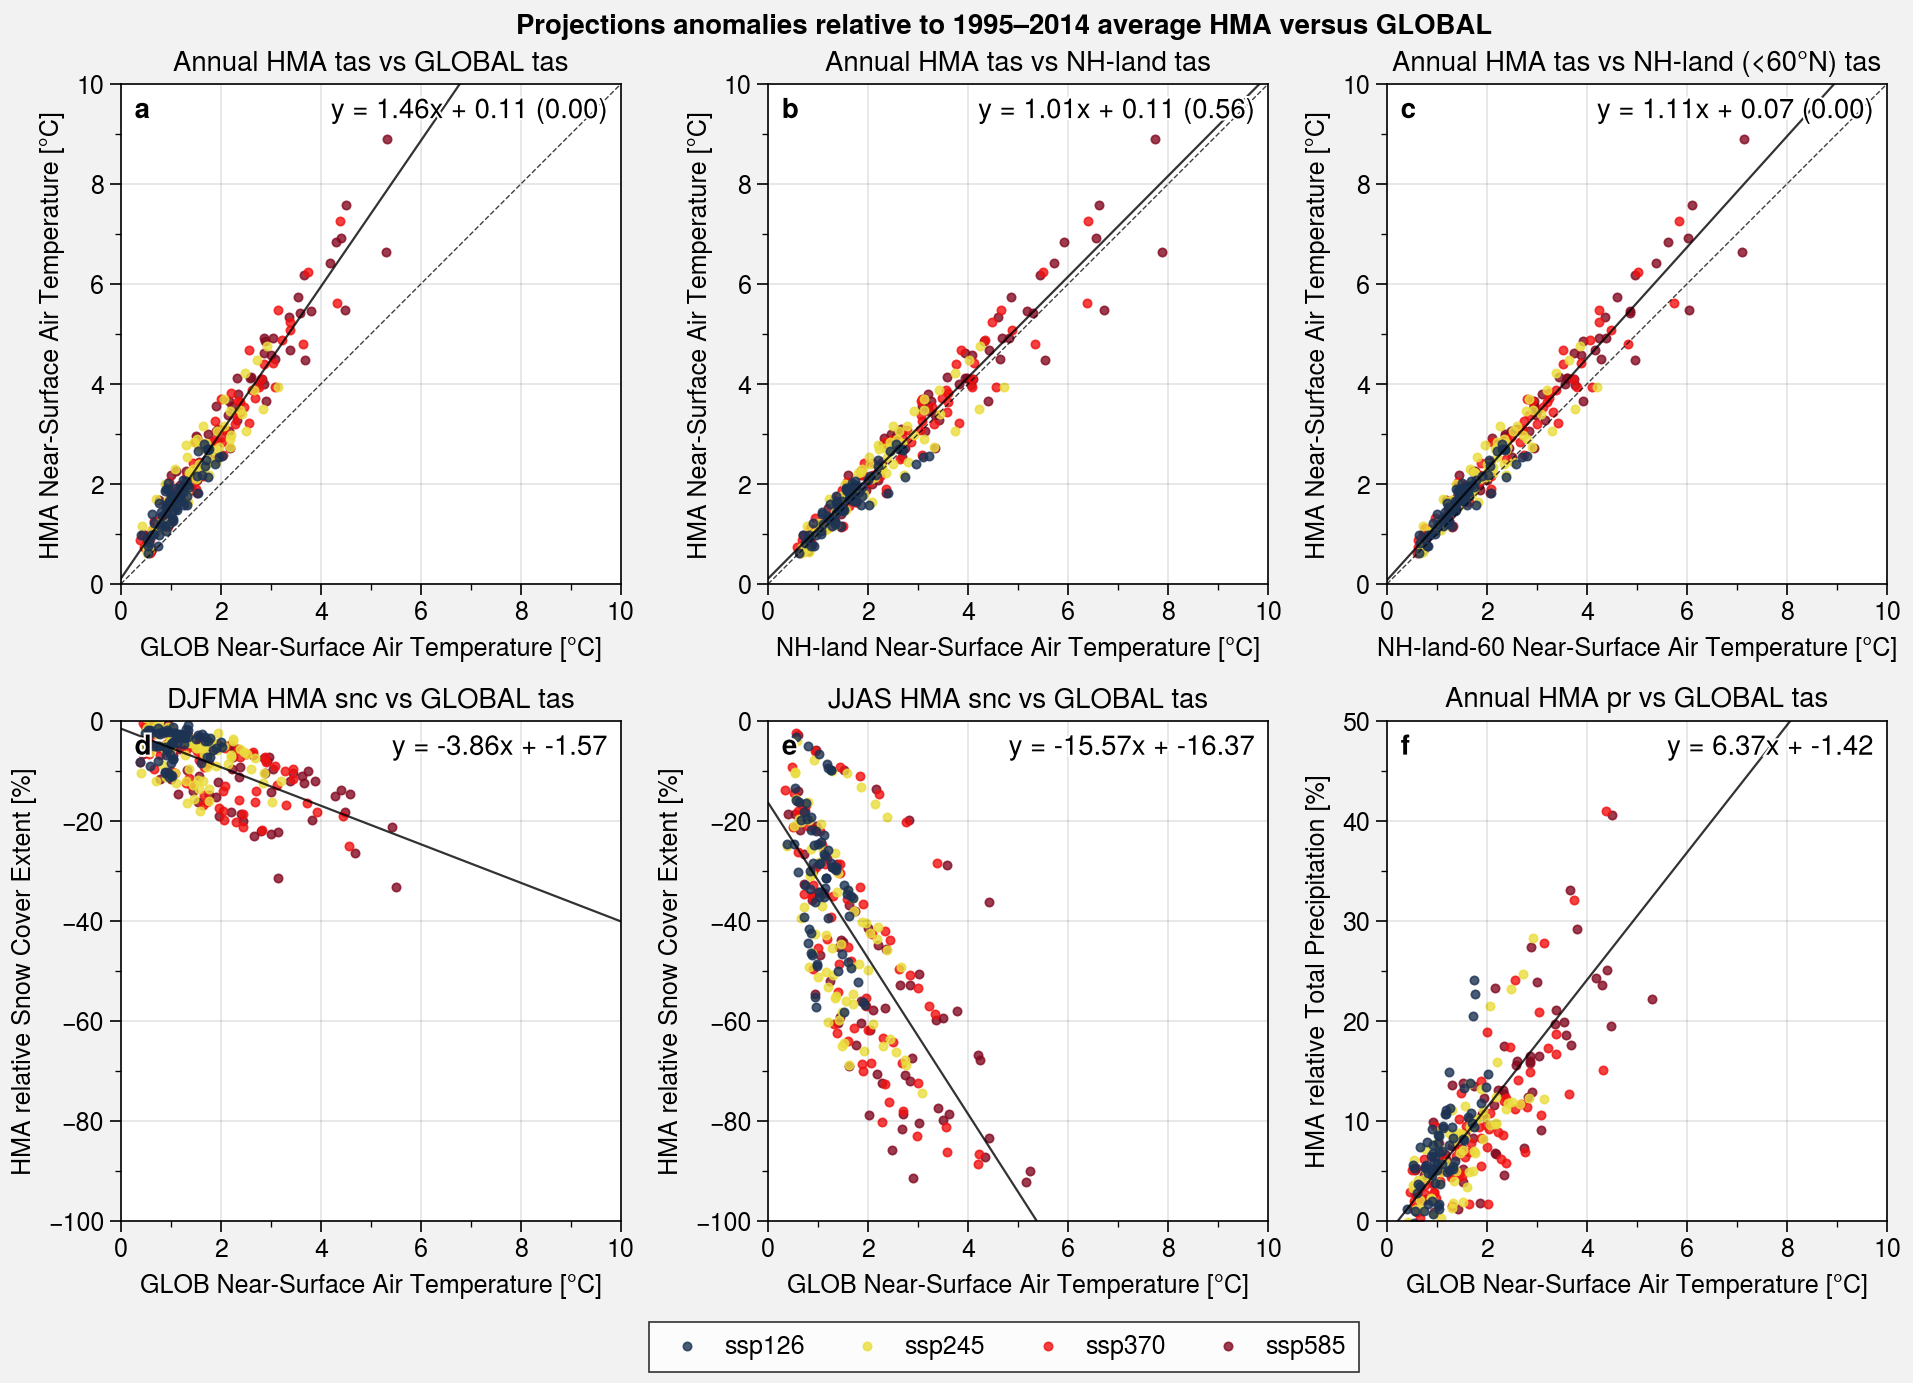

In [7]:
# colors = ['indigo9', 'blue5', 'orange5', 'red6']
colors = [(29/255, 51/255, 84/255), (234/255, 221/255, 61/255), (242/255, 17/255, 17/255), (132/255, 11/255, 34/255)] # CMIP6 official colors
marker = '.'
alpha = 0.8

titles = [
    'Annual HMA tas vs GLOBAL tas', 'Annual HMA tas vs NH-land tas', 'Annual HMA tas vs NH-land (<60°N) tas', 
    'DJFMA HMA snc vs GLOBAL tas', 'JJAS HMA snc vs GLOBAL tas', 'Annual HMA pr vs GLOBAL tas', 
]

fig, axs = plot.subplots(ncols=3, nrows=2, share=0)
k=0

for var in variables:
    label, units, levels, cmap, extend, \
    levels_diff, cmap_diff, extend_diff, \
    levels_bias, cmap_bias, extend_bias = u.get_var_infos(var)
    
    if var in ['pr', 'snc']: # relative
        units = '%'
        label = 'relative ' + label
    
    
    if var in ['tas', 'pr']:
        seasons = ['Annual']
    elif var == 'snc':
        seasons = ['DJFMA', 'JJAS']
        
    for season in seasons:
        if var == 'tas':
            zones = ['GLOB', 'NH-land', 'NH-land-60']
        elif var in ['snc', 'pr']:
            zones = ['GLOB']
        
        for x_zone in zones:
            for zone in ['HMA']:
                for i, scenario in enumerate(scenarios):
                    if k == 0:
                        axs[k].scatter(
                            df.loc[(season, scenario), ('tas', x_zone)], 
                            df.loc[(season, scenario), (var, zone)],
                            color=colors[i], label=scenario, zorder=-i, marker=marker, alpha=alpha
                        )
                    else:
                        axs[k].scatter(
                            df.loc[(season, scenario), ('tas', x_zone)], 
                            df.loc[(season, scenario), (var, zone)], 
                            color=colors[i], zorder=-i, marker=marker, alpha=alpha
                        )
                
                xlims=(0,10); xlocator=2; xminorlocator=1.00001
                
                if var == 'tas':
                    ylims=(0,10); ylocator=2; yminorlocator=1.00001
                elif var in ['snc']:
                    ylims=(-100,0); ylocator=20; yminorlocator=10
                elif var in ['pr']:
                    ylims=(0,50); ylocator=10; yminorlocator=5

                axs[k].format(
                    xlabel=x_zone + ' Near-Surface Air Temperature [°C]', 
                    ylabel=zone + ' ' + label + ' ['+units+']', 
                    xlim=xlims, ylim=ylims,
                    xlocator=xlocator, xminorlocator=xminorlocator,
                    ylocator=ylocator, yminorlocator=yminorlocator,
                    title=titles[k]
                )
                
                # Regression
                if var == 'tas':
                    axs[k].plot(ylims, ylims, 'k--', alpha=0.75, zorder=0, linewidth=0.5)

                reg = stats.linregress(
                    np.concatenate(df.loc[(season), ('tas', x_zone)]), 
                    np.concatenate(df.loc[(season), (var, zone)])
                )
                x = np.array(xlims)
                y = reg.slope*x + reg.intercept
                axs[k].plot(x, y, 'k-', linewidth=0.8, alpha=0.8)

                if var in ['tas']:                    
                    # Test significant difference from x=y (we use linregress and remove x from y to test from 0) 
                    reg2 = stats.linregress(
                        np.concatenate(df.loc[(season), ('tas', x_zone)]), 
                        [y - x for y, x in zip(df.loc[(season, scenario), (var, zone)], df.loc[(season, scenario), ('tas', x_zone)]) for scenario in scenarios]
                    )
                    
                    axs[k].format(urtitle='y = ' + str(round(reg.slope, 2)) + 'x + ' + str(round(reg.intercept, 2)) + ' (%.2f)' % round(reg2.pvalue, 2))
                    
                    
                else:
                    axs[k].format(urtitle='y = ' + str(round(reg.slope, 2)) + 'x + ' + str(round(reg.intercept, 2)))
 
                k += 1


axs.format(
    suptitle = 'Projections anomalies relative to 1995–2014 average HMA versus GLOBAL',
    abc=True, abcloc='ul'
)

fig.legend(loc='b', frame=True, ncols=4)

filename = 'fig10_HMA-vs-global'
fig.save('img/'+filename+'.jpg'); fig.save('img/'+filename+'.png'); fig.save('img/'+filename+'.pdf')